In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Обучение без учителя

Хотя и большое количество приложений МО сегодня основываются на задаче обучения с учителем, значительная часть доступных данных часто неразмечена: у нас есть входные признаки **Х**, но нет меток **y**. На самом деле, в обучении без учителя большой потенциал.

Предположим, мы хотим создать систему, которая получала бы изображения каждого предмета на ленте какого-то производства, и определяла бы, является ли предмет дефектным или нет. Вы с лёгкостью сможете построить систему, которая будет собирать фотографии предметов, и таким образом соберёте громадный датасет. Но вот незадача - вскоре вы обнаруживаете, что ваш датасет неразмечен.

Теперь перед вами стоит задача разметки полученного датасета, а для этого потребуется большое количество экспертов, времени и денег, однако, вам в любом случае потребуется разметить маленькую часть вашего датасета. Теперь если вы обучите модель на таком датасете, то её производительность, скорее всего, будет удручать. Плюс ко всему, продукция на заводе может меняться, а значит весь процесс создания модели продется повторять снова и снова.

Не будет ли лучше, если алгоритм сможет без помощи человека разметить каждую оставшуюсь картинку? - Добро пожаловать в обучение без учителя.

## Кластеризация

**Кластеризация** - это задача определения схожих объектов и приписывание их к кластерам, группам или схожим объектам.

Прямо как в классификации, каждый образец приписывается к конкретной группе. Однако, в отличие от классификации, кластеризация - это задача обучения без учителя.

In [3]:
from sklearn.datasets import load_iris

In [10]:
iris = load_iris(as_frame=False)
X = iris.data
y = iris.target

sepal_X = X[:, 2:]

Рассмотрим графики ниже: на графика датасет Ирисов, а слева он размечен метками трёх видов Ирисов (всего на графиках два признака - длина и ширина лепестков). Как можно понять, по левому датасету мы с легкостью сможем обучить привычные нам модели логистической регрессии, SVM, леса и т.п. Однако, на правом датасете всё будет куда сложнее. 

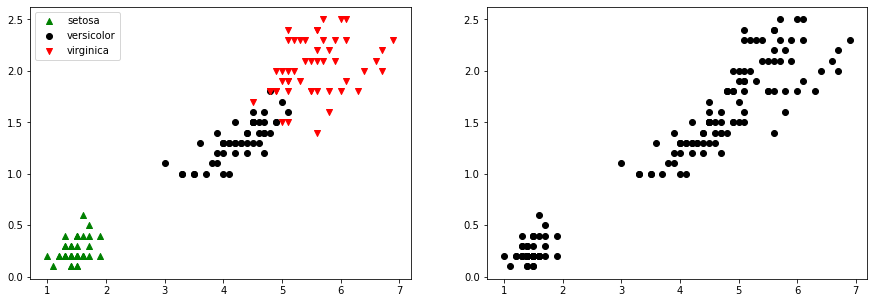

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(sepal_X[y==0, 0], sepal_X[y==0, 1], c='g', marker='^', label='setosa')
plt.scatter(sepal_X[y==1, 0], sepal_X[y==1, 1], c='k', marker='o', label='versicolor')
plt.scatter(sepal_X[y==2, 0], sepal_X[y==2, 1], c='r', marker='v', label='virginica')
plt.legend()

plt.subplot(122)
plt.scatter(sepal_X[y==0, 0], sepal_X[y==0, 1], c='k')
plt.scatter(sepal_X[y==1, 0], sepal_X[y==1, 1], c='k')
plt.scatter(sepal_X[y==2, 0], sepal_X[y==2, 1], c='k')